In [1]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="viridis")

# Statistics & Public Health
West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.
The city of Chicago, Illinois has been keeping track of mosquito population and WNV prevalence using a series of traps that they place around the city. 
They are then able to study the captured specimens and monitor the state of WNV spread in the city.

### Data Dictionary
- Year (int64)	Year that the WNV test is performed			
- Week  (int64)	Week that the WNV test is performed			
- Address (string)	 Block	Address of the location of trap.		
- Block (int64)	Block number of address		
- Trap_Id (string) of the trap. Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.	
- Trap_type (string) Type of trap 		
- Date (string)	Date and time that the WNV test is performed. Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.	
- Mosquito_number (int64) Number of mosquitoes caught in this trap. These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.	
- Mosquito_ID  (string)	Id for Mosquito species	string		
- WNV  Present  (string) Whether West Nile Virus was present in these mosquitos		
- Species (string) Mosquito species	string		
- Lat (float64)	Latitude of trap	
- Lon( float64)	Longitude of trap

### Importing data

In [2]:
df = pd.read_csv("mosquito_data.csv")
df.head(10)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
5,2019,39,21XX N CANNON DR,21,T054C,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.921777,-87.632140
6,2019,39,11XX W ROOSEVELT RD,11,T048,GRAVID,2019-09-26 00:09:00,3,Res,negative,CULEX RESTUANS,41.866915,-87.654919
7,2019,39,22XX W 51ST ST,22,T061,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.801048,-87.680425
8,2019,39,22XX N CANNON DR,22,T054A,GRAVID,2019-09-26 00:09:00,1,Ter,negative,CULEX TERRITANS,41.922737,-87.632450
9,2019,39,3XX W 104TH ST,3,T095,GRAVID,2019-09-26 00:09:00,1,Sal,negative,CULEX SALINARIUS,41.705328,-87.632955


### Exploring the initial information about the Data Set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


**Formatting - Column Name** 

In [4]:
# setting a standard nomenclature for the column names
column_names = df.columns
column_names = column_names.str.upper()
new_column_name =[]

for name in column_names:
    new_column_name.append(name.replace(" ","_"))
    
df.columns =new_column_name    
df.columns


Index(['YEAR', 'WEEK', 'ADDRESS_BLOCK', 'BLOCK', 'TRAP', 'TRAP_TYPE', 'DATE',
       'MOSQUITO_NUMBER', 'MOSQUITO_ID', 'WNV_PRESENT', 'SPECIES', 'LAT',
       'LON'],
      dtype='object')

Replacing the spaces in the column name with "_" and converting into UPPER CASE to establish a structure which can be used to differentiate column name of the dataset from the variables in the overall project

### Exploring the Basic statistic about the DataSet

In [5]:
# Exploring the  basic statistics of the dataset
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,18495.0,NaN,NaN,NaN,2012.905812,3.725857,2007.0,2010.0,2013.0,2016.0,2019.0
WEEK,18495.0,NaN,NaN,NaN,31.004001,4.33202,20.0,28.0,31.0,34.0,40.0
ADDRESS_BLOCK,18495,154,100XX W OHARE AIRPORT,2039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOCK,18495.0,NaN,NaN,NaN,54.314788,36.712796,1.0,22.0,51.0,89.0,132.0
TRAP,18495,190,T002,406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRAP_TYPE,18495,4,GRAVID,17741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DATE,18495,298,2016-08-11 00:08:00,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOSQUITO_NUMBER,18495.0,NaN,NaN,NaN,10.879913,13.475066,1.0,2.0,5.0,14.0,50.0
MOSQUITO_ID,18495,4,Res,11866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WNV_PRESENT,18495,2,negative,14501,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part 1 - Basic Data Wrangling
### 1. What is the shape of the dataframe?

In [6]:
# Exploring the shape of the dataframe
df_shape =df.shape
print(f"The dataframe contains {df_shape[1]} Columns and {df_shape[0]} Rows")

The dataframe contains 13 Columns and 18495 Rows


### 2. Convert the 'Date' column to have a datetime format.

In [7]:
# converting the datatype
df["DATE"]= df["DATE"].astype("datetime64")
df["DATE"].head()

0   2019-09-26 00:09:00
1   2019-09-26 00:09:00
2   2019-09-26 00:09:00
3   2019-09-26 00:09:00
4   2019-09-26 00:09:00
Name: DATE, dtype: datetime64[ns]

### 3. Pick two numeric and two categorical columns: What data they are storing? How are they distributed?
####  3a. Numeric Columns
    - MOSQUITO_NUMBER
    - WEEK

In [8]:
# Exploring the basic statistic 
df[["MOSQUITO_NUMBER","WEEK"]].describe().T

,count,mean,std,min,25%,50%,75%,max
MOSQUITO_NUMBER,18495.0,10.879913,13.475066,1.0,2.0,5.0,14.0,50.0
WEEK,18495.0,31.004001,4.332020,20.0,28.0,31.0,34.0,40.0


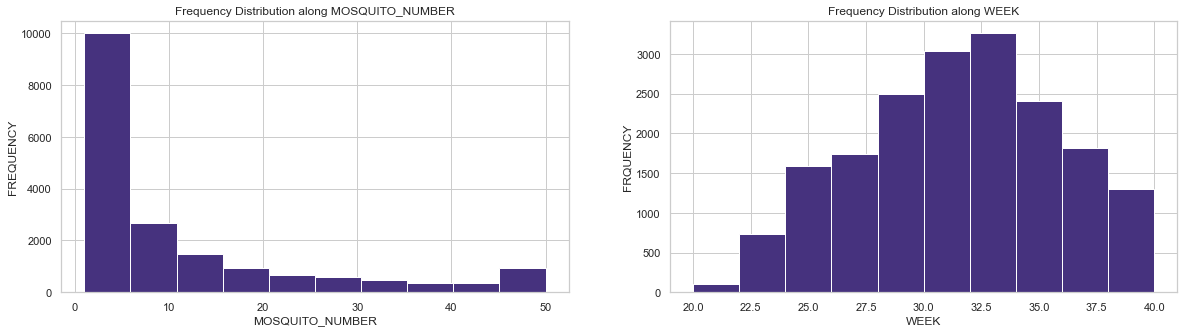

In [9]:
# Sub plots to evaluate the distribution of numeric variable MOSQUITO_NUMBER and WEEK
plt.subplots(1, 2, figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(df["MOSQUITO_NUMBER"])
plt.title('Frequency Distribution along MOSQUITO_NUMBER')
plt.xlabel('MOSQUITO_NUMBER')
plt.ylabel('FREQUENCY')

plt.subplot(1, 2, 2)
plt.hist(df["WEEK"],)
plt.title('Frequency Distribution along WEEK')
plt.xlabel('WEEK')
plt.ylabel('FRQUENCY')

plt.show()

##### The insights drawn from the graph of the numerical column

**MOSQUITO NUMBER**
- With the frequency count close to 1000 , 0 - 5 mosquitoes per trap is most common followed by 5-10 mosquitoes per trap with a frequency count above 2000
- The distribution is right skewed, however there is certain jump in mosquito numbers around the 50 mark.
- Therefore, the data around the 50 mark cannot be considered as an outlier and need futher investigation.

**WEEK**
- The WNV tests are performed within the 20th-40th week of the year and the frequency of tests perfomed are normally distributed over this period.
- The tests perfomed per week gradually increases and reaches at its peek by the 34 -35th week

#### 3b. Categorical Columns
    - TRAP_TYPE
    - SPECIES

In [10]:
# Exploring the distribution of TRAP_TYPE
df["TRAP_TYPE"].value_counts()

GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: TRAP_TYPE, dtype: int64

In [11]:
# Exploring the distribution of SPECIES
df["SPECIES"].value_counts()

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: SPECIES, dtype: int64

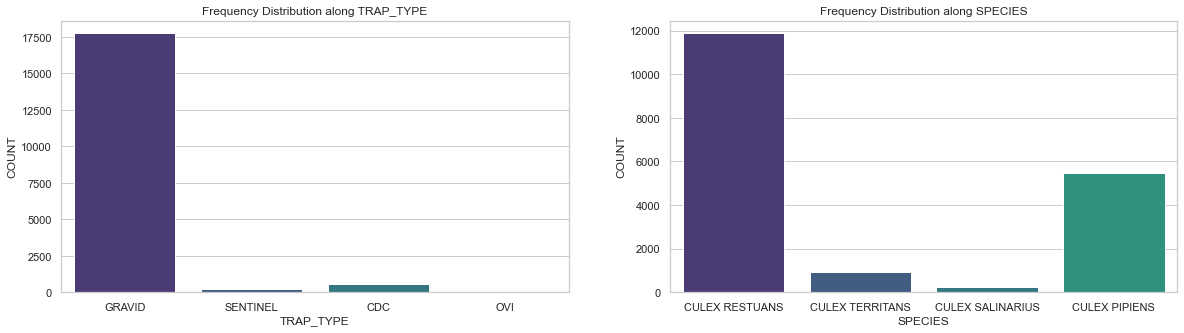

In [12]:
plt.subplots(1, 2, figsize=(20,5 ))
#Frequency Distribution along TRAP_TYPE
plt.subplot(1, 2, 1)
sns.countplot(data = df ,x="TRAP_TYPE")
plt.title('Frequency Distribution along TRAP_TYPE')
plt.xlabel('TRAP_TYPE')
plt.ylabel('COUNT')

# Frequency Distribution along SPECIES
plt.subplot(1, 2, 2)
sns.countplot(data = df ,x="SPECIES")
plt.title('Frequency Distribution along SPECIES')
plt.xlabel('SPECIES')
plt.ylabel('COUNT') 
plt.show()

The insights drawn from the graph of the Categorical column

**TRAP TYPE**
- The trap type is dvided into four categories: 
    1. GRAVID
    2. CDC
    3. SENTINEL
    4. OVI
- Gravid trap is one of the most popular type of trap as it is used 17741 times in the study compared to the other types
- OVI  is the type which is only used once as found in the overall dataset

**SPECIES**
- There are four types of species which are identified from the data
      1. CULEX RESTUANS      
      2. CULEX PIPIENS        
      3. CULEX TERRITANS       
      4. CULEX SALINARIUS     
- The CLUEX RESTUANS species of mosquito is the most common in the city followed by CULEX PIPIENS species



###  4. Are there any columns that contain duplicate information? If so, remove the redundant columns.

In [13]:
# Exploring the duplicate rows
df.duplicated().value_counts()

False    17837
True       658
dtype: int64

In [14]:
# Droping the 662 duplicate rows from the dataset
df.drop_duplicates(inplace=True)

# Cross validating the results
df.duplicated().value_counts()


False    17837
dtype: int64

In [15]:
# Exploring the duplicate column
df.T.duplicated()

YEAR               False
WEEK               False
ADDRESS_BLOCK      False
BLOCK              False
TRAP               False
TRAP_TYPE          False
DATE               False
MOSQUITO_NUMBER    False
MOSQUITO_ID        False
WNV_PRESENT        False
SPECIES            False
LAT                False
LON                False
dtype: bool

Based on the above result there is no duplicate columns found .However it was observed that 4 columns, as mentioned below may contains duplicate information:
1. "YEAR" and "WEEK" Columns may contains the information of the "DATE Column in parts
2. "BLOCK" Column may contain partial information of the "ADDRESS_BLOCK" Column
3. "MOSQUITO_ID" may be the represenation of 1st three Character of the species in the GENUS_SPECIES nomenclature format of the "SPECIES" Column 

Based on intial observations, validation tests are done before removing the column as duplicate or redundant columns 


#### 4.1.1 Check  to  evaluate the similarity among DATE, WEEK and YEAR Columns
Reference URL 
- https://stackoverflow.com/questions/49050302/pandas-convert-date-to-week-number
- https://pandas.pydata.org/docs/reference/api/pandas.Period.week.html

In [16]:
# Extracted year and week from "DATE" Column and assigned in two columns "EXTRACTED_WEEK" and "EXTRACTED_YEAR"
df['EXTRACTED_WEEK'] = df['DATE'].dt.isocalendar().week
df['EXTRACTED_YEAR'] = df['DATE'].dt.year

# Exploring the Duplicate rows count with respect to YEAR and DATE column 
duplicate_year_count =df[df["YEAR"]!=df["EXTRACTED_YEAR"]].shape[0]
print(f"The data in the YEAR column is almost {100-duplicate_year_count}% similar to the year from the DATE Column")

# Exploring the Duplicate rows count with respect to WEEK and DATE column
duplicate_week_count=df[df["WEEK"]!=df["EXTRACTED_WEEK"]].shape[0]
print(f"The week Number in the WEEK column is almost {round(duplicate_week_count/df.shape[0]*100,2)}% different from the week number based on the data of the DATE Column")

# Removing the duplicate and working column from the dataset
df.drop(["YEAR","EXTRACTED_YEAR", "EXTRACTED_WEEK"],axis=1,inplace=True)

The data in the YEAR column is almost 100% similar to the year from the DATE Column
The week Number in the WEEK column is almost 33.53% different from the week number based on the data of the DATE Column


Based on the above result the following inference are drawn,
- The "YEAR" Column is removed from the dataset as it is 100% same as the year mentioned in the DATE Column.
- The "WEEK" Column is not removed as 42.16% of the data are different from week number based on the date mentioned in the DATE column.

#### 4.1.2 Check  to  evaluate the similarity between BLOCK and ADDRESS_BLOCK Columns

In [17]:
# Extracted BLock data from "ADDRESS_BLOCK" Column
extracted_block_id = df["ADDRESS_BLOCK"].str.split("X", expand=True)
extracted_block_id[0]= extracted_block_id[0].astype("int64")

# Comparing the Block column with respect to extracted Data
duplicate_block_count= df[df["BLOCK"]==extracted_block_id[0]].shape[0]/df.shape[0]*100
print(f"Duplicate_Block_Value_Count_% with repsect to ADDRESS_BLOCk column : {duplicate_block_count}")

# Removing the duplicate and working column from the dataset
df.drop(["BLOCK"],axis=1,inplace=True)


Duplicate_Block_Value_Count_% with repsect to ADDRESS_BLOCk column : 100.0


Based on the above result:
- The block number in the BLOCK column is 100.0% similar to the block number mentioned in the ADDRESS_BLOCK column
- Therefore the BLOCK column is removed from the data set

#### 4.1.3 Check  to  evaluate the similarity between MOSQUITO_ID and SPECIES Columns

In [18]:
# Extracted ID data from "SPECIES" Column 
extracted_species_name = df["SPECIES"].str.split(" ", expand=True)
species_firstthreecharacter= extracted_species_name[1].str[:3]

# Comparing the MOSQUITO_ID column with respect to extracted Data
duplicate_MOSQUITO_ID_count= df[df["MOSQUITO_ID"].str.upper()==species_firstthreecharacter.str.upper()].shape[0]/df.shape[0]*100
print(f"Duplicate_Mosquito_Id_Count_% with repsect to SPECIES column : {duplicate_block_count}")

# Removing MOSQUITO_ID column
df.drop(["MOSQUITO_ID"],axis=1,inplace=True)


Duplicate_Mosquito_Id_Count_% with repsect to SPECIES column : 100.0


Based on the above results:
- It is clear that the Mosquito_Id is 100% similar to the 1st three Character of the species in the GENUS_SPECIES nomenclature of the "SPECIES" Column
- Therefore, the MOSQUITO_ID column is removed from the data set

### 5. Are there any null values in the dataframe? If so, deal with them appropriately.

In [19]:
# checking for null value percentage for each column 
df.isnull().mean()*100

WEEK                0.00000
ADDRESS_BLOCK       0.00000
TRAP                0.00000
TRAP_TYPE           0.00000
DATE                0.00000
MOSQUITO_NUMBER     0.00000
WNV_PRESENT         0.00000
SPECIES             0.00000
LAT                12.70393
LON                12.70393
dtype: float64

**Analyzing Missing Value**


In [20]:
# Evaluting the missing value with respect to Address block columns
df_missing_value_address = df[df["LAT"].isnull()==True][["ADDRESS_BLOCK","TRAP","LAT","LON"]]
grouped_address_data =df_missing_value_address.groupby("ADDRESS_BLOCK").count()
grouped_address_data.T

ADDRESS_BLOCK,100XX W OHARE,100XX W OHARE AIRPORT,115XX S AVENUE L,30XX S HOYNE,43XX N ASHLAND,4XX W 127TH,65XX N OAK PARK AVE,79XX S CHICAGO,81XX S ASHLAND,98XX S AVENUE G
TRAP,178,1499,32,12,10,264,17,127,116,11
LAT,0,0,0,0,0,0,0,0,0,0
LON,0,0,0,0,0,0,0,0,0,0


In [21]:
# Replacing the missing value it a lable "UNKNOWN"
df.fillna("UNKOWN",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   WEEK             17837 non-null  int64         
 1   ADDRESS_BLOCK    17837 non-null  object        
 2   TRAP             17837 non-null  object        
 3   TRAP_TYPE        17837 non-null  object        
 4   DATE             17837 non-null  datetime64[ns]
 5   MOSQUITO_NUMBER  17837 non-null  int64         
 6   WNV_PRESENT      17837 non-null  object        
 7   SPECIES          17837 non-null  object        
 8   LAT              17837 non-null  object        
 9   LON              17837 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 2.0+ MB


Based on the above analysis, the following inferences are drawn:
- There are two columns "LAT" and "LON" with a null value of 15% with respect to the over all data set.
- These 15% represent 10 address blocks and 2924 traps which rule out the possibilty of removing the missing value rows
- Therefore, the missing values being a categorical variable are replaced with a new lable as "UNKNOWN" 

## Part 2 - Basic EDA

### 1.Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

In [22]:
# Creating a matrix with respect to number  mosquito traped  with respect to year and month
date_mosquito_no = df.groupby([df["DATE"].dt.year,df['DATE'].dt.month]).agg({"MOSQUITO_NUMBER":["sum"]}).unstack()

In [23]:
# Changing the name of the columns
date_mosquito_no.columns =["MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER"]
date_mosquito_no

,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER
DATE,,,,,,
2007,30.0,307.0,1376.0,18204.0,3315.0,924.0
2008,NaN,461.0,1426.0,1412.0,583.0,NaN
2009,86.0,1992.0,2245.0,619.0,440.0,80.0
2010,NaN,1383.0,3634.0,1507.0,807.0,32.0
2011,NaN,2132.0,3104.0,937.0,1083.0,NaN
2012,NaN,1075.0,5818.0,3033.0,777.0,NaN
2013,NaN,2372.0,7312.0,7548.0,5623.0,NaN
2014,NaN,4028.0,8280.0,13170.0,4115.0,174.0
2015,NaN,2015.0,4758.0,3029.0,530.0,NaN


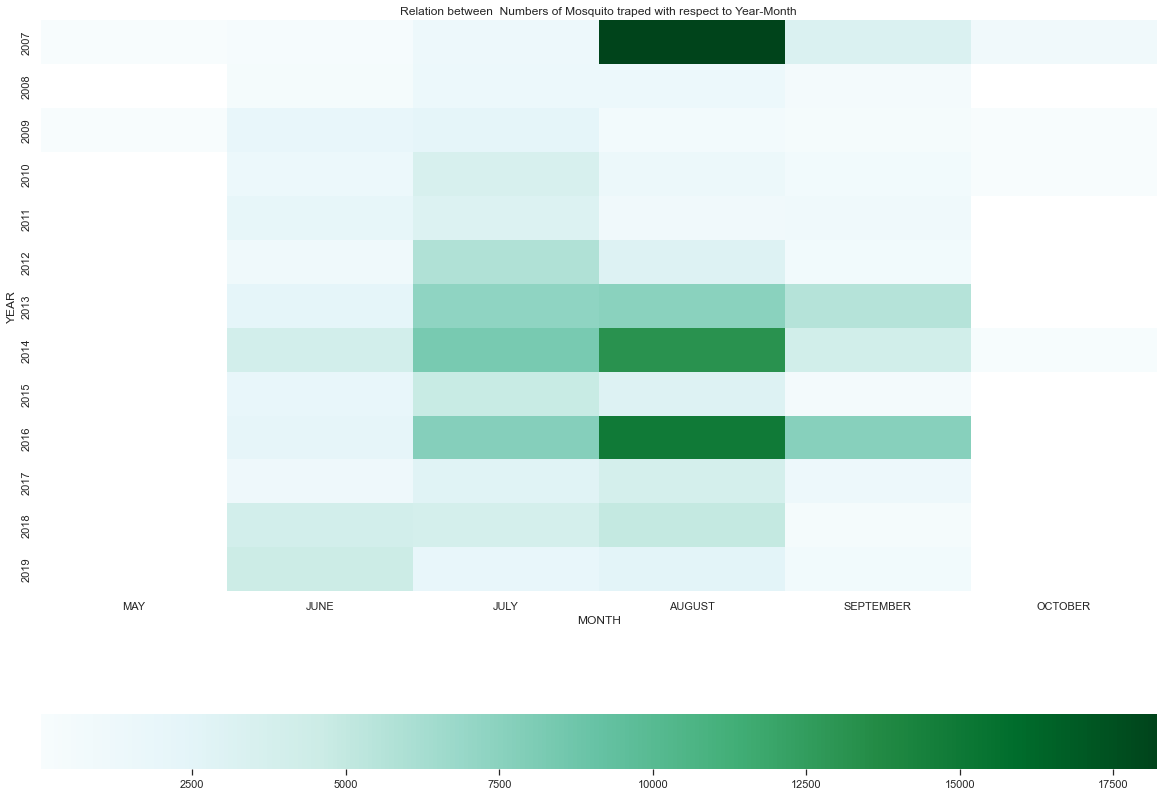

In [24]:
# Heat map to explain the number of Mosquito with respect to Year-Month
plt.figure(figsize=(20,15))
sns.heatmap(date_mosquito_no ,cmap="BuGn", cbar_kws={"orientation": "horizontal"})
plt.ylabel('YEAR')
plt.xlabel('MONTH')
plt.title("Relation between  Numbers of Mosquito traped with respect to Year-Month")
plt.show()

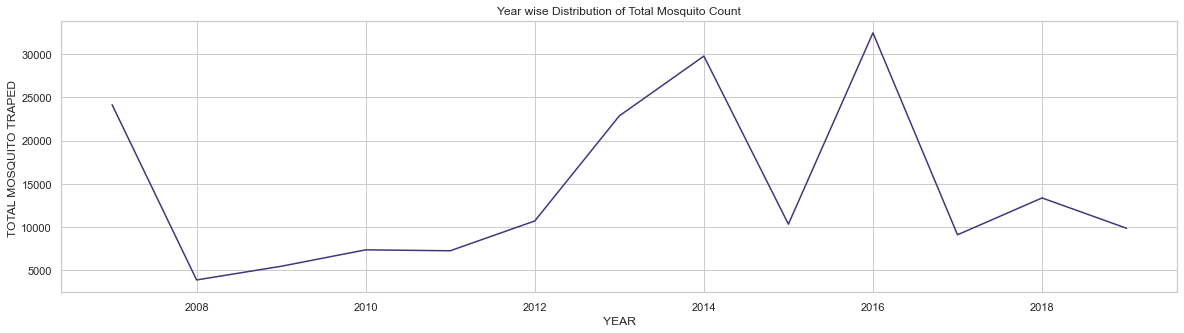

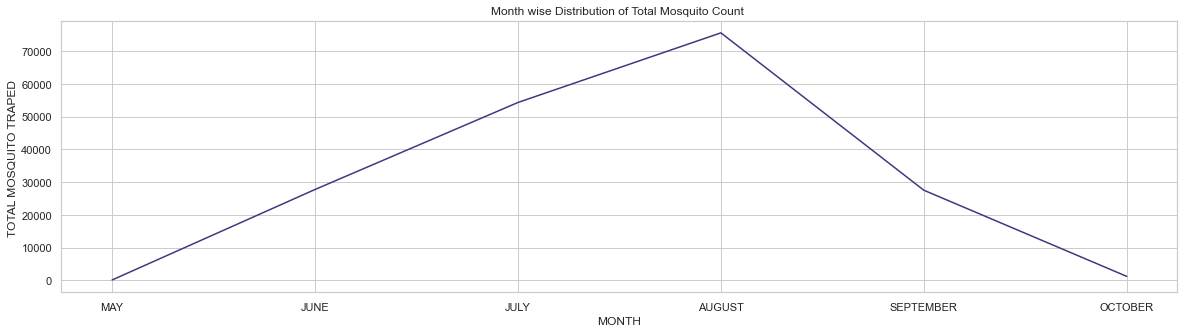

In [25]:
plt.figure(figsize=(20,5))

# Plot to explain the total number of mosquito traped  each year from 2007-2019 
plt.plot(date_mosquito_no.sum(axis=1))
plt.xlabel(" YEAR ")
plt.ylabel("TOTAL MOSQUITO TRAPED ")
plt.title("Year wise Distribution of Total Mosquito Count")

# Plot to explain the total number of mosquito traped with respect to months 
plt.show()
plt.figure(figsize=(20,5))
plt.plot(date_mosquito_no.sum())
plt.xlabel("MONTH")
plt.ylabel("TOTAL MOSQUITO TRAPED ")
plt.title("Month wise Distribution of Total Mosquito Count ")

plt.show()

The insight drawn from the above plots are as follows
- 2014 and 2016 are the years where a maximum number of mosquitoes are recorded.
- While analyzing the monthly distrubution, August is the time, where a maximum number of mosquitoes are recorded which makes the month most prone to be infected by WNV. 

## Part 3 - Advanced EDA

### 1. Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.



In [26]:
# Exploring the WNV_PRESENT count based on the species  category 
df.groupby(["SPECIES","WNV_PRESENT",]).agg({"WNV_PRESENT":["count"]})

WNV_PRESENT
                                   count
SPECIES          WNV_PRESENT            
CULEX PIPIENS    negative           4074
                 positive           1237
CULEX RESTUANS   negative           9309
                 positive           2078
CULEX SALINARIUS negative            215
                 positive              7
CULEX TERRITANS  negative            903
                 positive             14

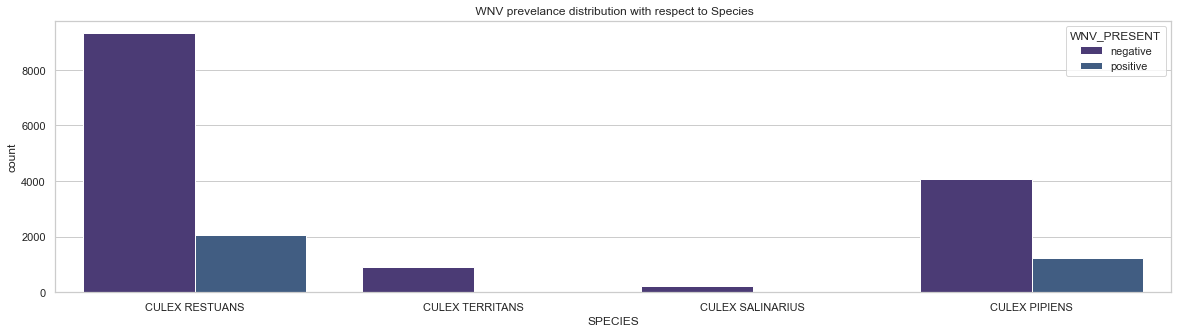

In [27]:
# Barplot to show the relation between SPECIES and WNV prevelance 
plt.figure( figsize=(20,5))
sns.countplot( x=df["SPECIES"], hue=df["WNV_PRESENT"])
plt.title(" WNV prevelance distribution with respect to Species")
plt.show()

Based on the above table and the graph the following inferences are drawn:
- The positivity count i.e the WNV prevalance is maximum for CULEX RESTUANS mosquitoes with a count of 2557 out of 11866. However CULEX PIPIENS mosquitoes are most susceptible to the WNV as close to 1412 out of 5486 ie. 25% of the mosquito are infected
- CULEX SALINARIUS and CULEX TERRITANS are the two species where the infection rate is less than 5%


### 2. Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type. 


In [28]:
# Exploring the number of mosquito caught based on the trap type 
df.groupby(["TRAP_TYPE"]).agg({"MOSQUITO_NUMBER":["sum"]})

,MOSQUITO_NUMBER
,sum
TRAP_TYPE,
CDC,9514
GRAVID,171905
OVI,1
SENTINEL,5134


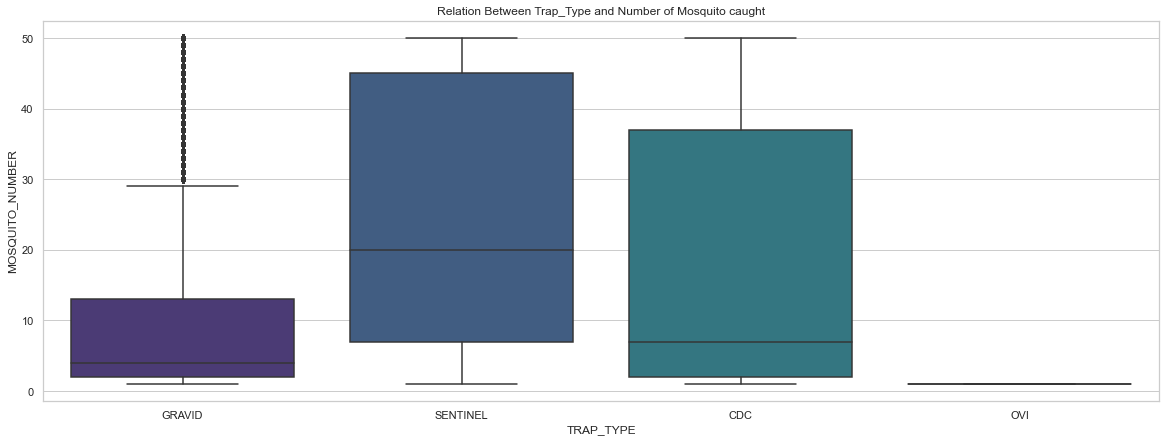

In [29]:
# Box plot to explore the relationship between Trap_Type and Number of Mosquito caught
plt.figure(figsize=(20,7))
sns.boxplot(data=df, y="MOSQUITO_NUMBER", x="TRAP_TYPE")
plt.title("Relation Between Trap_Type and Number of Mosquito caught")
plt.show()

In terms of the relationship between the number of mosquitoes caught and trap type the following inference are drawn:
- GRAVID is the most effecient trap type follwed by SENTINEL and CDC to trap mosquito.
- However, SENTINEL and CDC are the two types of traps which manages to capture the entire range of mosquitoes compared to the GRAVID Trap where the higher percentile is limited to 15
- Regarding OVI trap it will be unfair to evalute the efficiency as the sample size is limited to one. 

### 3. Using an appropriate visual, come up with an additional insight of your choice.

In [30]:
# creating a dataframe to undestand the realtion between the WEEK, species and WNV_prevelance
df["WEEK"]=df["DATE"].dt.isocalendar().week
week_species_WNN = df.groupby(["WEEK","SPECIES","WNV_PRESENT"]).agg({"MOSQUITO_NUMBER":["sum"]})
week_species_WNN.columns=["MOSQUITO_COUNT"]
week_species_WNN.reset_index(inplace=True)
week_species_WNN


,WEEK,SPECIES,WNV_PRESENT,MOSQUITO_COUNT
0,22,CULEX PIPIENS,negative,8
1,22,CULEX RESTUANS,negative,153
2,23,CULEX PIPIENS,negative,59
3,23,CULEX RESTUANS,negative,3104
4,23,CULEX RESTUANS,positive,24
...,...,...,...,...
105,40,CULEX RESTUANS,positive,7
106,40,CULEX SALINARIUS,negative,1
107,40,CULEX TERRITANS,negative,24
108,41,CULEX PIPIENS,negative,197


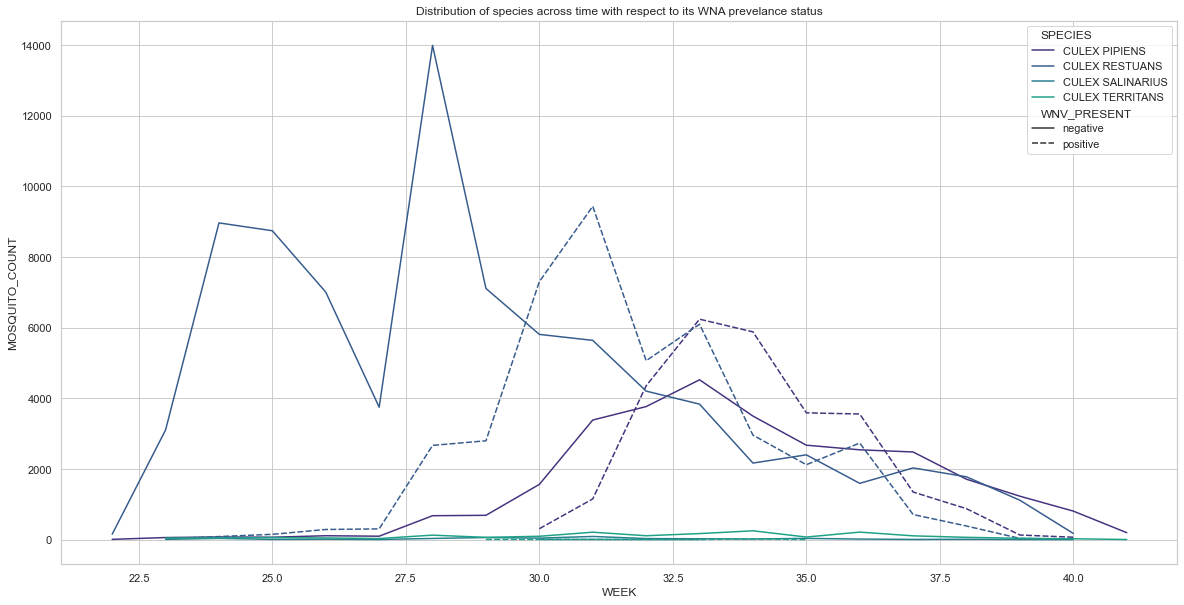

In [31]:
# line plot  to understand the distribution of species across time with respect to its WNA status
plt.figure(figsize=(20,10))
sns.lineplot(data=week_species_WNN, 
             x="WEEK", 
             y="MOSQUITO_COUNT",
             ci=0,
             hue="SPECIES", 
             style ="WNV_PRESENT",)
plt.title("Distribution of species across time with respect to its WNA prevelance status")
plt.show()

The aim of the above visualization is to undestand the relation between species and their WNV_prevelance with respect to the number of mosquitoes and time of the year. The insights drawn are as follows:
- The CULEX RESTUANS mosquities which are not infected with WNV are found more in the 20th-30th weeks and then the count gradually goes down. But the same species with WNV virus dominate between 28th-33th weeks with the count crossing above 6000 mark
- For CULEX PIPIENS mosquitoes which are infected with WNV touches the 7000 mark around 33th-34th week whereas the same species which are not infected with WNV crosses the 4000 mark for a short period of 7 days around 33rd week but are found throughout the time primarly between 25th-40th week.
- The other two species are seen across all the weeks, but the overall numbers are very low and CLUEX SALINARIUS which are infected with WNV are recorded between the weeks 29-35 with a very low count (close to Zero).
- Lastly, based on the above observations, it can be inferred that the maximum possibilty for the disease to spread by the mosquitoes are within the 27th-37th weeks as the count is above 2000 for both the species who are predominant carriers of the WNV. 